In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.DataFrame(housing.data,columns=housing.feature_names)

In [3]:
target = pd.DataFrame(housing.target,columns = ['Target'])

In [4]:
housetarget =pd.concat([house,target], axis =1)

In [5]:
housetarget

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
merged_df = pd.concat([normalized_df,outlier_remove_df["Target"]], axis = 1)

In [51]:
merged_df.to_csv("merged_df.csv")

In [6]:
def outlier(s, t):
    sd = s.std()
    mean = s.mean()
    min_ = mean - 3 * sd
    max_ = mean + 3 * sd
    
    return t[(s < max_) & (s > min_)]


In [7]:


outlier_remove_df = housetarget.copy()  

for column in house.columns:
    outlier_remove_df = outlier(house[column], outlier_remove_df)


C:\Users\pc\AppData\Local\Temp\ipykernel_2580\658218749.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return t[(s < max_) & (s > min_)]


In [20]:
normalized_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.862381,0.966294,1.424948,-0.333600,-1.259520,-0.424668,1.049979,-1.320935,2.257376
1,2.847548,-0.640402,0.814260,-0.717241,1.301547,-0.928521,1.040621,-1.315944,1.407748
2,2.196891,1.849977,2.492445,0.033108,-1.045173,-0.145784,1.035941,-1.325926,1.349962
3,1.190802,1.849977,0.469794,0.030249,-0.968797,-0.433271,1.035941,-1.330916,1.252449
4,0.070911,1.849977,0.850047,0.089512,-0.960174,-0.847553,1.035941,-1.330916,1.260575
...,...,...,...,...,...,...,...,...,...
19789,-1.353742,-0.319062,-0.162102,0.475541,-0.615249,-0.418959,1.798671,-0.752010,-1.123982
19790,-0.732688,-0.881406,0.712667,1.823493,-1.217636,0.216575,1.803351,-0.811897,-1.133011
19791,-1.266676,-0.961741,-0.031049,0.377720,-0.415686,-0.684579,1.775275,-0.816888,-0.995770
19792,-1.162471,-0.881406,0.070436,0.760611,-0.743364,-0.913410,1.775275,-0.866793,-1.064391


In [10]:
 homenooutliertarget = outlier_remove_df.drop("Target" , axis = 1)


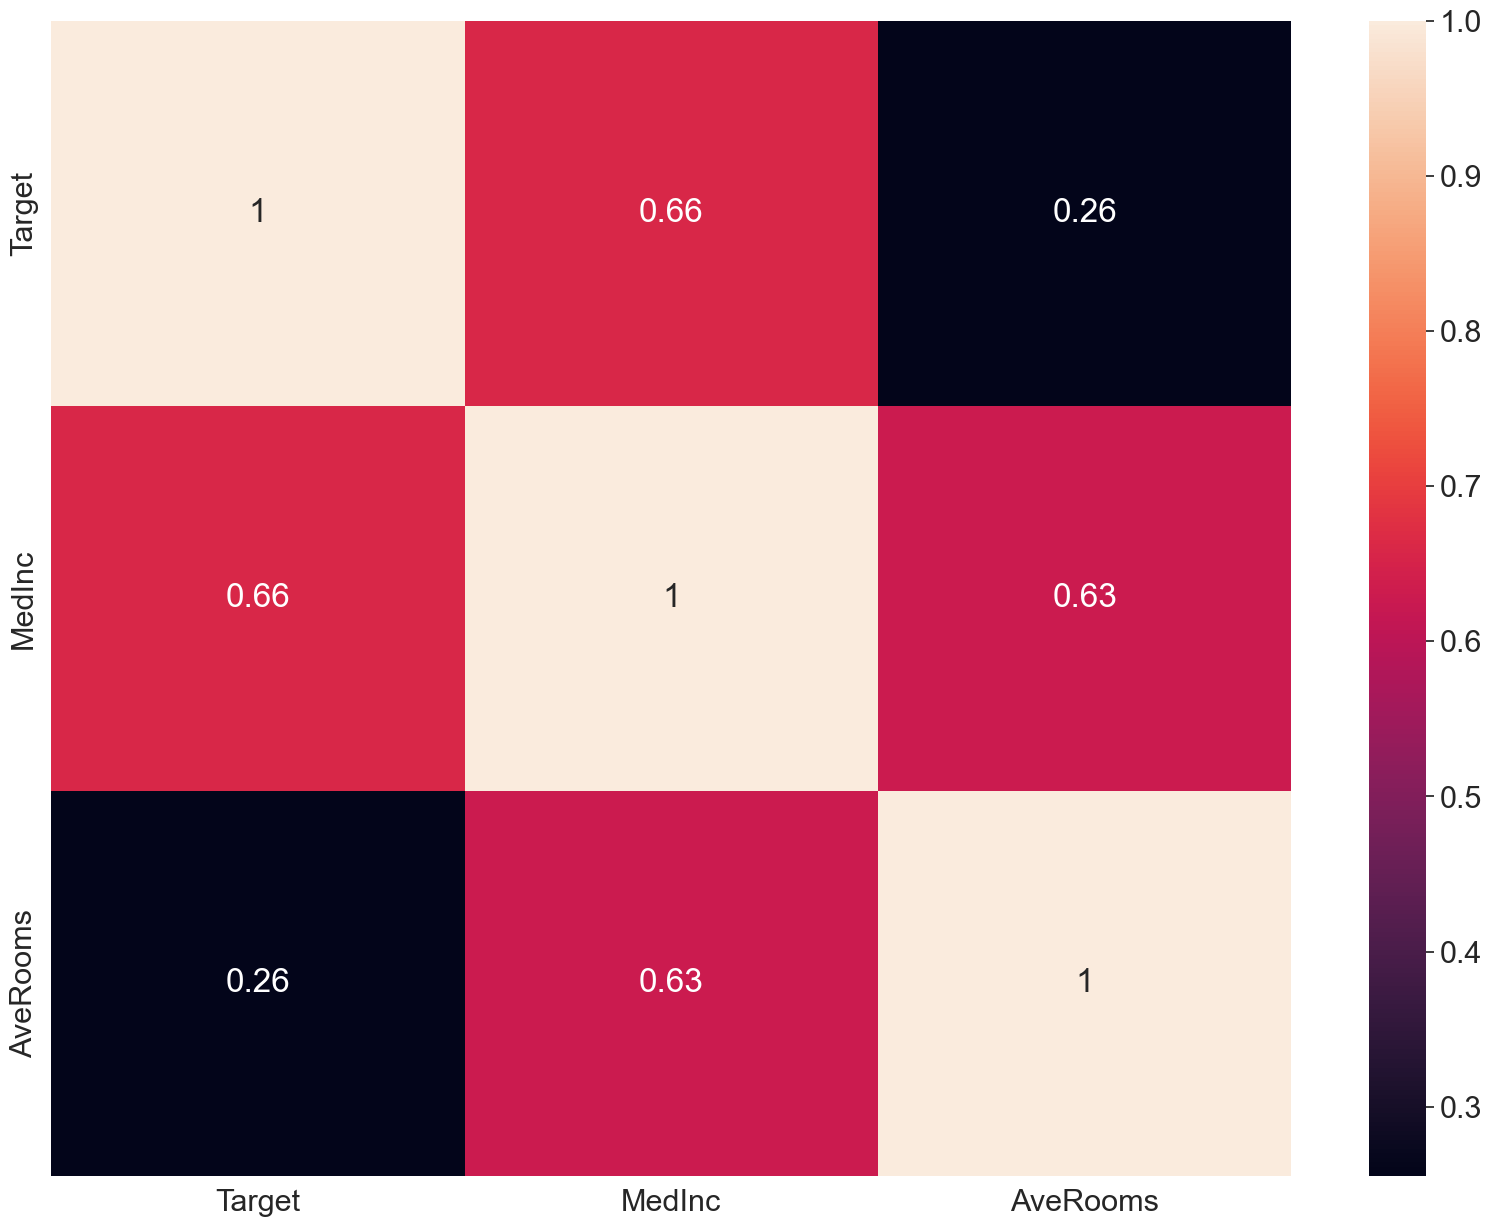

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 시본 스타일 설정
sns.set(font_scale=2)  # 폰트 크기 조절

corr = normalized_df.corr()
top_corr = normalized_df[corr.nlargest(3, 'Target')['Target'].index].corr()

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 15)

sns.heatmap(top_corr, annot=True, ax=ax1)

plt.show()

In [15]:

    
def nomalize(data):    
    from sklearn.preprocessing import StandardScaler
    from sklearn.compose import ColumnTransformer
    ct = ColumnTransformer([("standardize", StandardScaler(), data.columns)])

    
    normalized_df = pd.DataFrame(ct.fit_transform(data), columns=data.columns)
    return normalized_df

In [33]:
normalized_df = nomalize(outlier_remove_df)

In [34]:
normalized_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.862381,0.966294,1.424948,-0.333600,-1.259520,-0.424668,1.049979,-1.320935,2.257376
1,2.847548,-0.640402,0.814260,-0.717241,1.301547,-0.928521,1.040621,-1.315944,1.407748
2,2.196891,1.849977,2.492445,0.033108,-1.045173,-0.145784,1.035941,-1.325926,1.349962
3,1.190802,1.849977,0.469794,0.030249,-0.968797,-0.433271,1.035941,-1.330916,1.252449
4,0.070911,1.849977,0.850047,0.089512,-0.960174,-0.847553,1.035941,-1.330916,1.260575
...,...,...,...,...,...,...,...,...,...
19789,-1.353742,-0.319062,-0.162102,0.475541,-0.615249,-0.418959,1.798671,-0.752010,-1.123982
19790,-0.732688,-0.881406,0.712667,1.823493,-1.217636,0.216575,1.803351,-0.811897,-1.133011
19791,-1.266676,-0.961741,-0.031049,0.377720,-0.415686,-0.684579,1.775275,-0.816888,-0.995770
19792,-1.162471,-0.881406,0.070436,0.760611,-0.743364,-0.913410,1.775275,-0.866793,-1.064391


In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 독립변수와 종속변수 분리
X = normalized_df.drop('Target', axis=1)  # 독립변수
y = normalized_df['Target']  # 종속변수

# KFold로 데이터를 분할하여 모델 학습 및 평가
kf = KFold(n_splits=5, shuffle=True)  # 5-fold 교차 검증을 사용하겠습니다.

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # 훈련 데이터와 테스트 데이터 분할
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()  # 선형 회귀 모델을 초기화합니다. 여기에 원하는 모델을 사용하시면 됩니다.

    model.fit(X_train, y_train)  # 모델 훈련
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측값 계산

    mse = mean_squared_error(y_test, y_pred)  # MSE 계산
    mae = mean_absolute_error(y_test, y_pred)  # MAE 계산
    r_squared = r2_score(y_test, y_pred)  # R-squared 계산

    print("MSE:", mse)
    print("MAE:", mae)
    print("R-squared:", r_squared)

MSE: 0.3962585351875477
MAE: 0.44827406960767985
R-squared: 0.614360663834808
MSE: 0.38387921779448747
MAE: 0.4475939286137408
R-squared: 0.6152948104314138
MSE: 0.3444729590877727
MAE: 0.43294123591815575
R-squared: 0.642775295468401
MSE: 0.36844878008937754
MAE: 0.4460437059899646
R-squared: 0.6368093941424118
MSE: 0.3567732344465156
MAE: 0.43757039083964583
R-squared: 0.6412706934801506


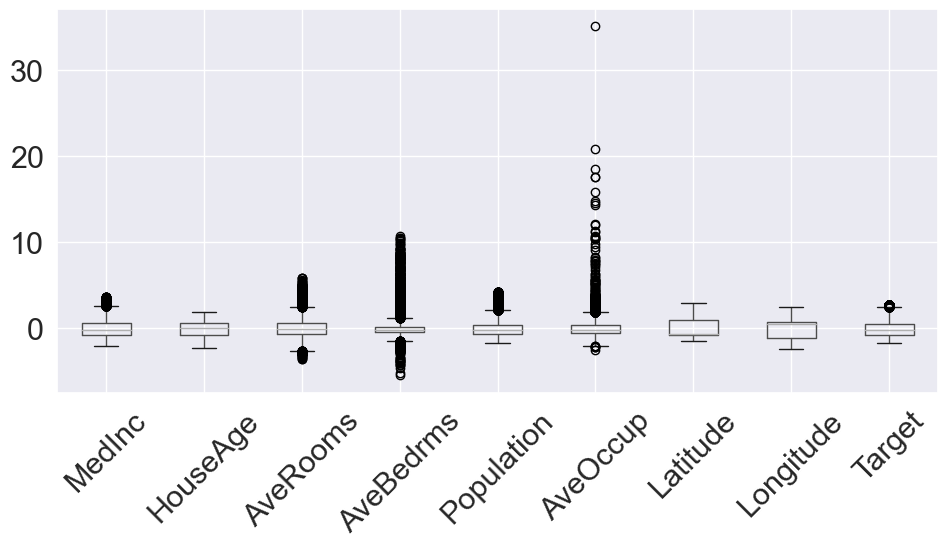

In [40]:
import matplotlib.pyplot as plt

# 모든 숫자형 칼럼에 대해 boxplot 그리기
plt.figure(figsize=(10, 6))  # 그림 크기 설정

normalized_df.boxplot(column=list(housetarget.select_dtypes(include=['number']).columns))
plt.xticks(rotation=45)  # x축 눈금 레이블 회전하여 표시


plt.tight_layout()  # 레이아웃 조정
plt.show()